In [1]:
from __future__ import print_function
import os, sys
import sklearn
import cv2
from matplotlib import pyplot as plt

import numpy as np

In [2]:
from config import CURRENT_DIR
IMAGE_PATH = os.path.abspath(os.path.join(CURRENT_DIR,"../data/images/teddy"))
FIRST = os.path.join(IMAGE_PATH, "im2.png")
SECOND = os.path.join(IMAGE_PATH, "im6.png")

In [3]:
first = cv2.imread(FIRST)
second = cv2.imread(SECOND)

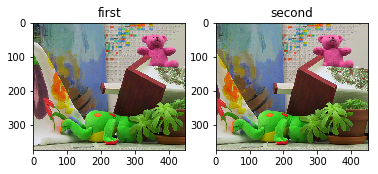

In [4]:
plt.figure()

plt.subplot(1,2,1)
plt.title("first")
plt.imshow(cv2.cvtColor(first, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.title("second")
plt.imshow(cv2.cvtColor(second, cv2.COLOR_BGR2RGB))
plt.show(block=True)


In [5]:
HEIGHT, WIDTH = first.shape[:2]

In [6]:
num_sampled_xs = int((WIDTH - 1) / 3)
num_sampled_ys = int((HEIGHT-1) / 3)
num_samples = num_sampled_xs * num_sampled_ys

In [7]:
sampled_x_indices = np.linspace(0, WIDTH-1, num_sampled_xs, dtype=np.dtype('uint32'))
sampled_y_indices = np.linspace(0, HEIGHT-1, num_sampled_ys, dtype=np.dtype('uint32'))

In [8]:
M_SIZE = num_samples, 3, 1
M = np.zeros(M_SIZE, dtype=np.float32)
N = np.zeros(M_SIZE, dtype=np.float32)

In [9]:
matrix_row_idx = 0
for ir in sampled_y_indices:
    for ic in sampled_x_indices:
        M[matrix_row_idx, 0], M[matrix_row_idx, 1], M[matrix_row_idx, 2] = first[ir][ic]
        N[matrix_row_idx, 0], N[matrix_row_idx, 1], N[matrix_row_idx, 2] = second[ir][ic]
        matrix_row_idx += 1

In [10]:
Mt = np.transpose(M, (1,0,2))

In [11]:
Mt = np.reshape(Mt, (3, -1))
N = np.reshape(N, (num_samples, -1))
M = np.reshape(M, (num_samples, -1))

In [12]:
Q = np.linalg.inv(Mt.dot(M)).dot(Mt).dot(N)

In [13]:
result = np.zeros(first.shape, dtype=np.uint8)

In [14]:
for ir in range(HEIGHT):
    for ic in range(WIDTH):
        cur_pixel = first[ir,ic].reshape(1,3).dot(Q).astype(np.uint8).reshape(3,1)
        result[ir,ic][0] = cur_pixel[0]
        result[ir,ic][1] = cur_pixel[1]
        result[ir,ic][2] = cur_pixel[2]


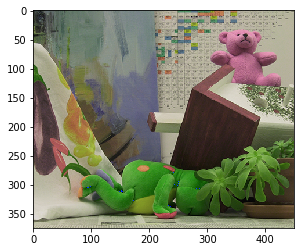

In [23]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# scikitlearn

In [19]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(fit_intercept=False)

In [25]:
model.fit(M, N)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [26]:
model.coef_

array([[ 0.6299481 , -0.03535347,  0.27626428],
       [ 0.02323155,  0.6397576 ,  0.2774466 ],
       [ 0.1539831 ,  0.02872324,  0.7762926 ]], dtype=float32)

In [29]:
Q

array([[ 0.6299483 ,  0.02322997,  0.15398297],
       [-0.0353543 ,  0.6397579 ,  0.02872311],
       [ 0.2762648 ,  0.2774478 ,  0.77629346]], dtype=float32)